In [1]:
import numpy as np

In [2]:
from adjustText import adjust_text

In [3]:
import verdict

In [4]:
import cc.atlas as atlas

In [5]:
a = atlas.Atlas( './atlas', bibtex_fp='../cc/tests/data/example_atlas/example.bib' )

#### Process the bibtex notes.

In [6]:
a.data.process_bibtex_annotations( word_per_concept=True )
a.data.identify_unique_key_concepts()

Dict, {
'VandeVoort2018a' : None,
'Stern2018' : None,
'Howk2017' : None,
'Garrison-kimmel2017' : None,
'Hopkins2017' : None,
'Hafen2016' : None,
'Muratov2016' : None,
'VandeVoort2016' : None,
'Hafen2019' : None,
'Hafen2019a' : None,
}

# Plot

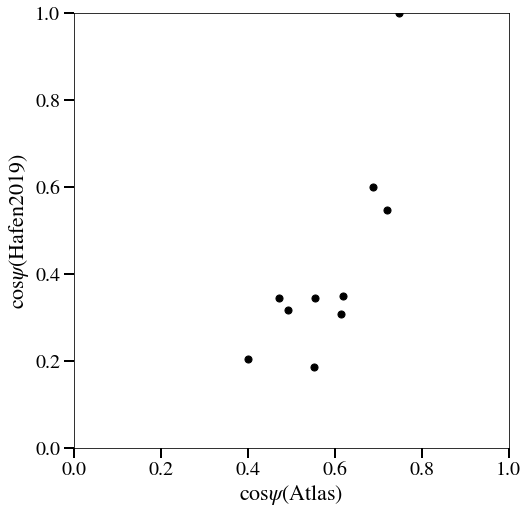

In [7]:
%matplotlib inline

cospsi_a, cospsi_h19 = a.plot_cospsi2d(
    a,
    a.data['Hafen2019'],
)